In [26]:
import cv2
import numpy as np
from PIL import Image as PILImage
from IPython.display import display, Image, clear_output
from time import sleep
import io

<module 'PIL.Image' from 'C:\\Program Files\\Python310\\lib\\site-packages\\PIL\\Image.py'>

255:


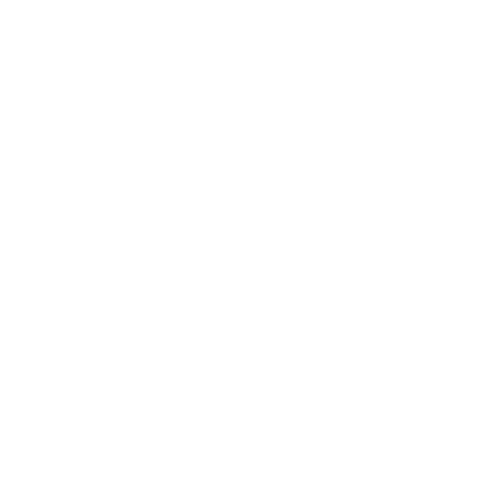

In [3]:
for i in range(0, 256):

    mat = np.full((500, 500, 3), i, dtype=np.uint8)

    img_cv2 = cv2.imencode('.jpg', mat)
    print(f'{i}:')
    display(Image(data=img_cv2[1].tobytes()))
    sleep(0.01)
    clear_output(wait=True)

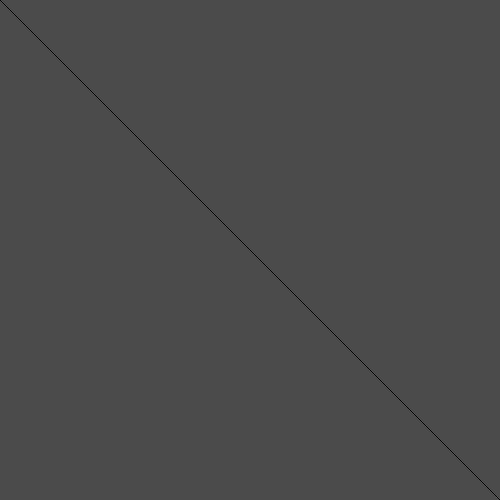

In [4]:
mat = np.full((500, 500, 3), 75, dtype=np.uint8)

for i in range(0, 500):
    mat[i][i] = np.array([0,0,0])

img_cv2 = cv2.imencode('.jpg', mat)
clear_output(wait=True)
display(Image(data=img_cv2[1].tobytes()))

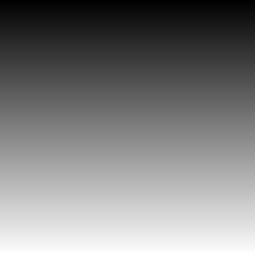

In [5]:
mat = np.full((255, 255, 3), 0, dtype=np.uint8)

for i in range(0, 255):
    for ii in range(0, 255):
        mat[i][ii] = np.array([i,i,i])

img_cv2 = cv2.imencode('.jpg', mat)
clear_output(wait=True)
display(Image(data=img_cv2[1].tobytes()))

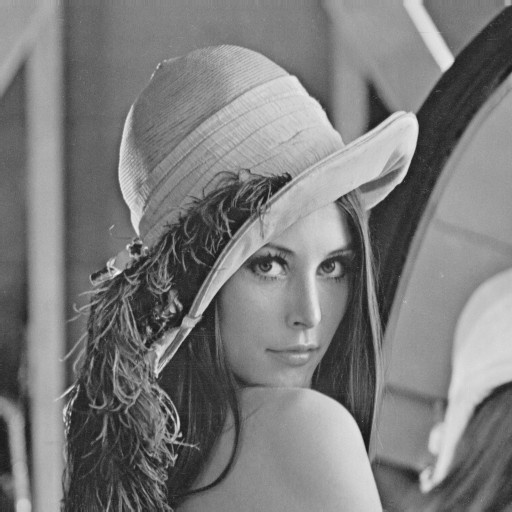

124.04413223266602

In [6]:
lena = cv2.imread('resources/Lena.jpg', cv2.IMREAD_GRAYSCALE)
img_cv2 = cv2.imencode('.jpg', lena)

clear_output(wait=True)
display(Image(data=img_cv2[1].tobytes()))
sum([sum(row) for row in lena])/(lena.shape[0]*lena.shape[1])

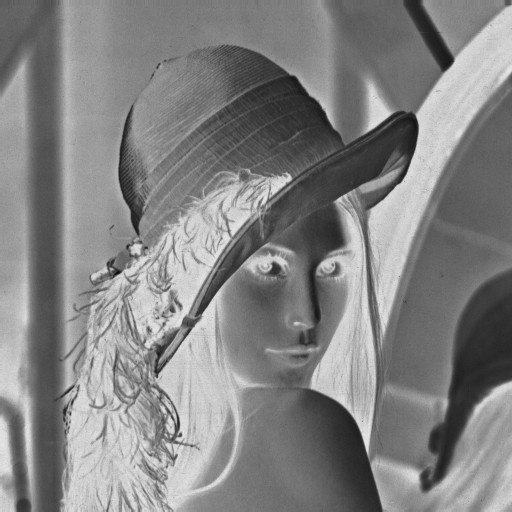

In [7]:
lena = cv2.imread('resources/Lena.jpg', cv2.IMREAD_GRAYSCALE)
for i in range(lena.shape[0]):
    for ii in range(lena.shape[1]):
        lena[i][ii] = 255-lena[i][ii]

img_cv2 = cv2.imencode('.jpg', lena)

clear_output(wait=True)
display(Image(data=img_cv2[1].tobytes()))

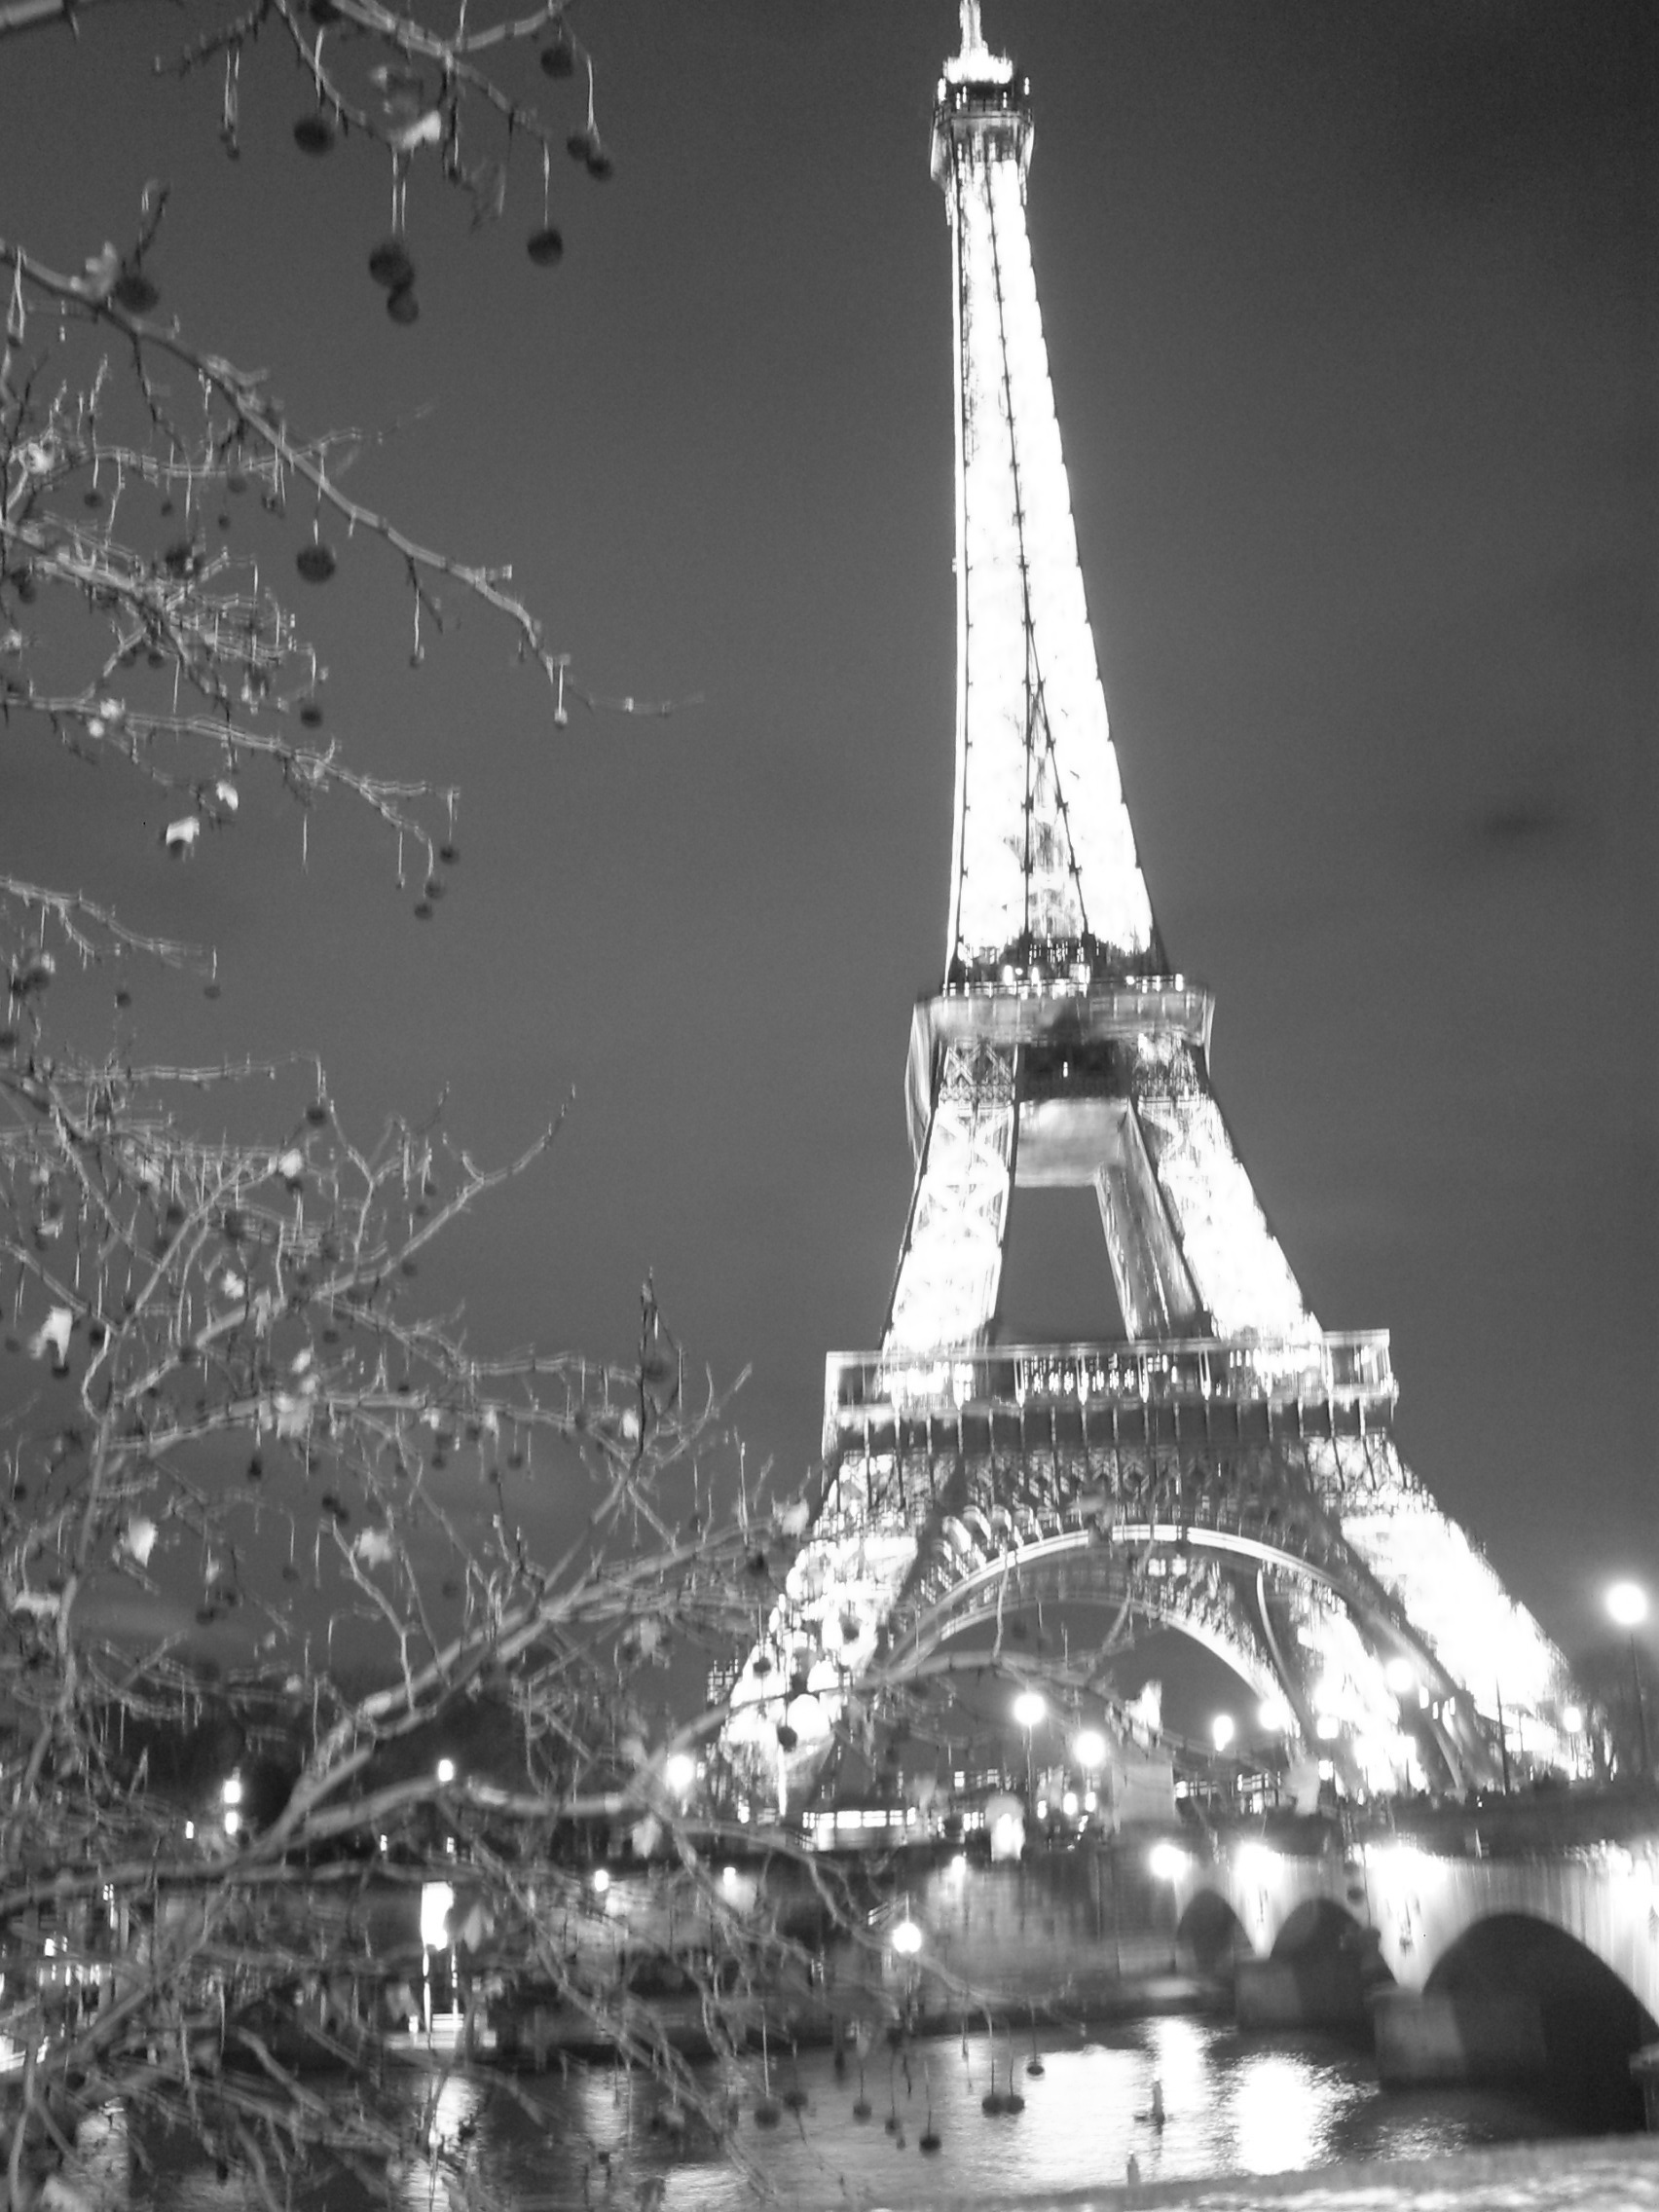

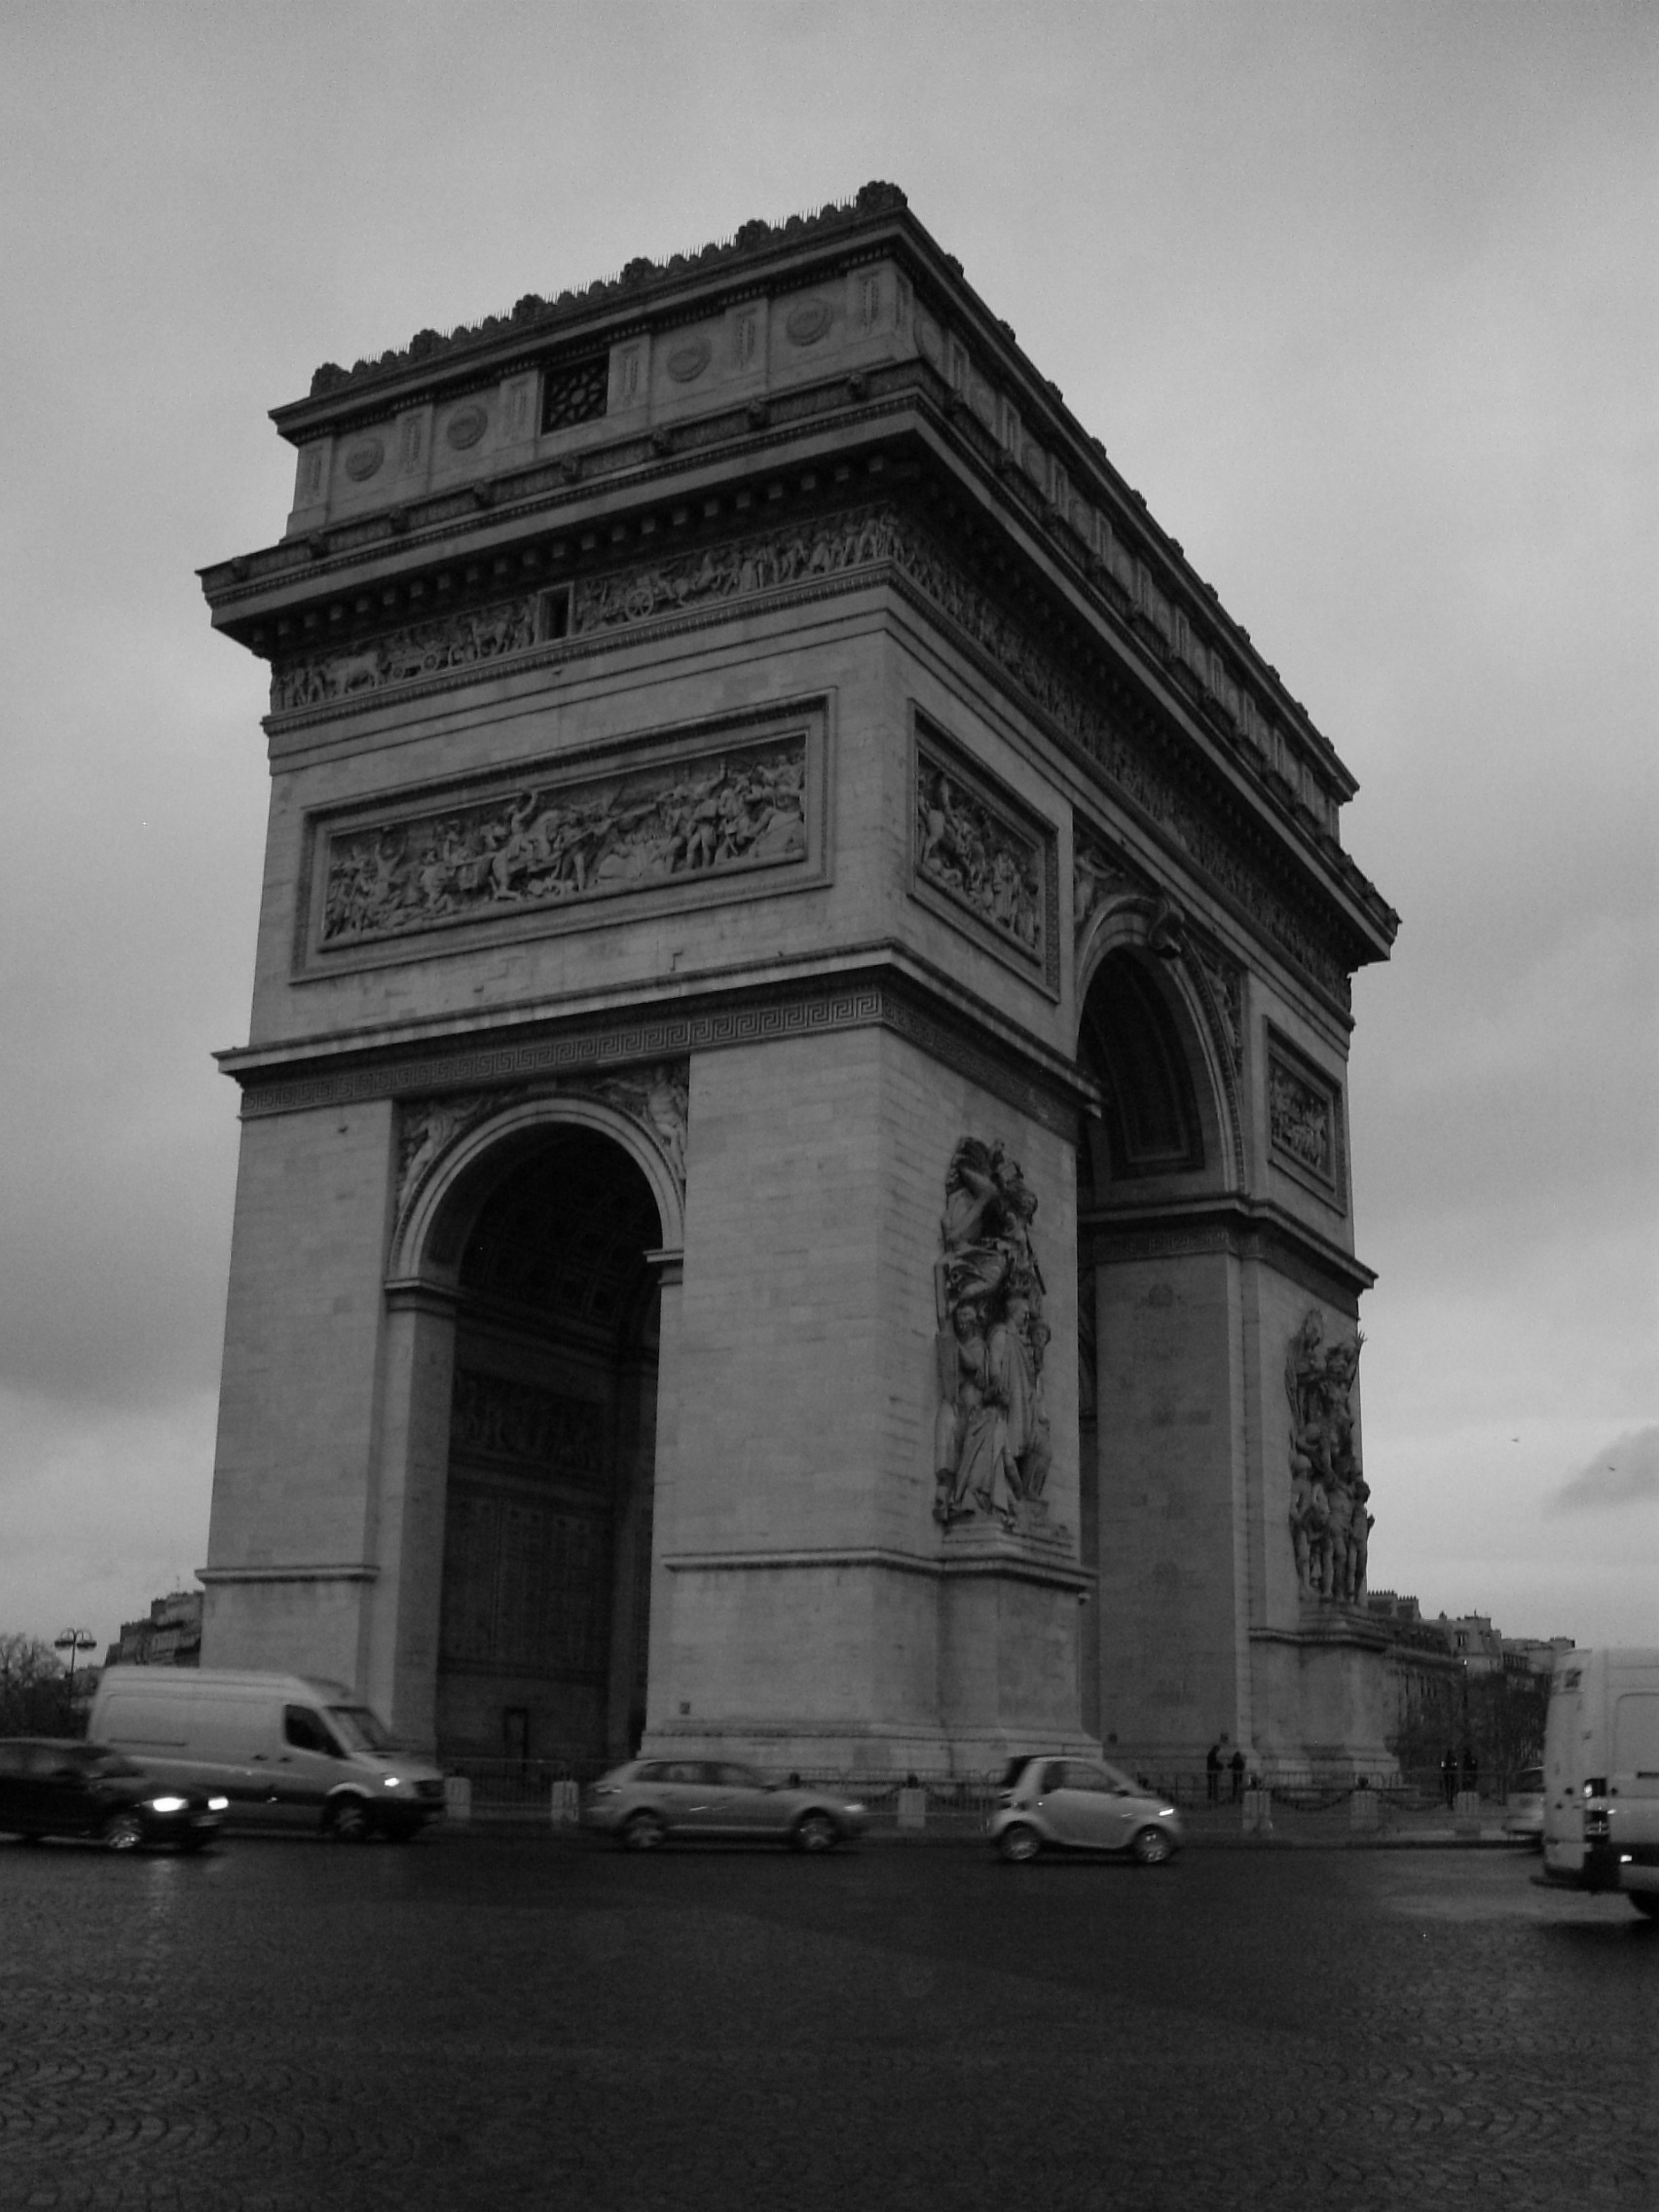

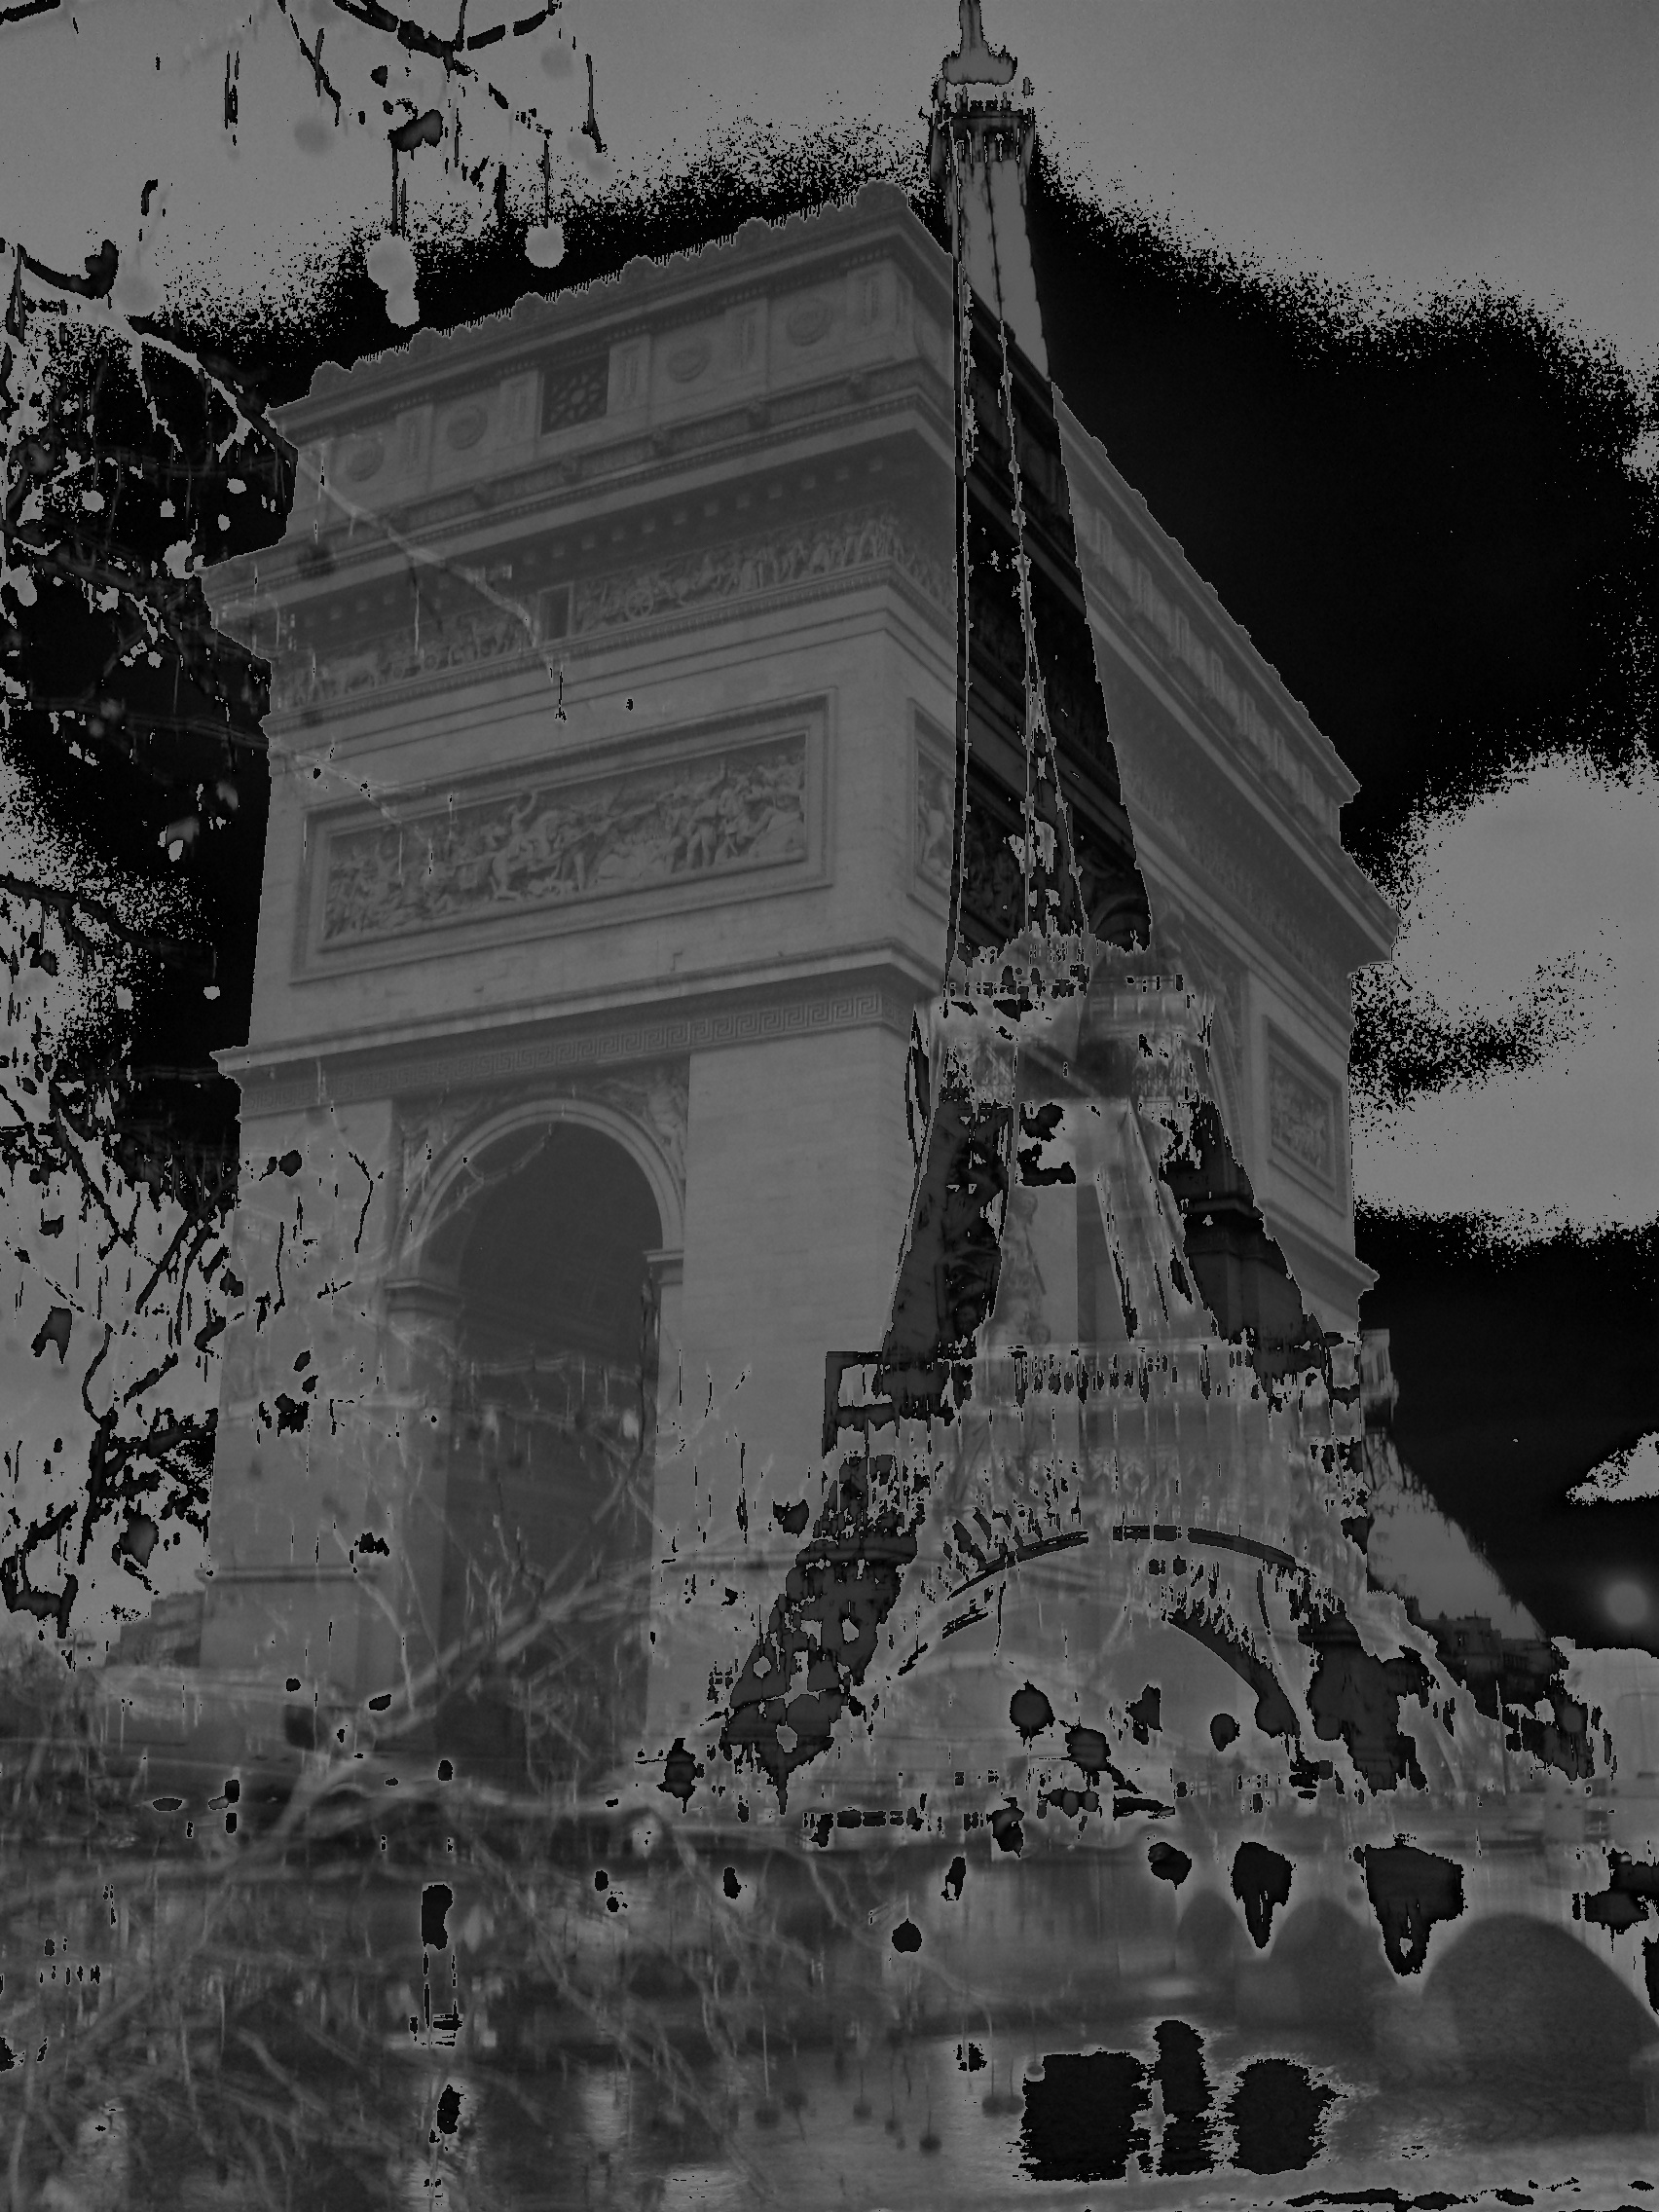

In [8]:
paris_a = cv2.imread('resources/paris_a.JPG', cv2.IMREAD_GRAYSCALE)
paris_b = cv2.imread('resources/paris_b.JPG', cv2.IMREAD_GRAYSCALE)
mat = np.full(paris_a.shape, 0, dtype=np.uint8)

for i in range(mat.shape[0]):
    for ii in range(mat.shape[1]):
        mat[i][ii] = (paris_a[i][ii] + paris_b[i][ii])//2

imga_cv2 = cv2.imencode('.jpg', paris_a)
imgb_cv2 = cv2.imencode('.jpg', paris_b)
img_cv2 = cv2.imencode('.jpg', mat)

clear_output(wait=True)
display(Image(data=imga_cv2[1].tobytes()))
display(Image(data=imgb_cv2[1].tobytes()))
display(Image(data=img_cv2[1].tobytes()))

In [13]:
corredor = cv2.imread('resources/corredor.bmp', cv2.IMREAD_GRAYSCALE)
corredorobjeto = cv2.imread('resources/corredorobjeto.bmp', cv2.IMREAD_GRAYSCALE)
mat = np.full(corredor.shape, 0, dtype=np.uint8)

for i in range(mat.shape[0]):
    for ii in range(mat.shape[1]):
        s = np.uint8(
            np.clip(int(corredor[i][ii]) - int(corredorobjeto[i][ii]),
                    0, 255)
        )
        mat[i][ii] = s

imga_cv2 = cv2.imencode('.jpg', corredor)
imgb_cv2 = cv2.imencode('.jpg', corredorobjeto)
img_cv2 = cv2.imencode('.jpg', mat)

clear_output(wait=True)
display(Image(data=imga_cv2[1].tobytes()), width=100, height=100)
display(Image(data=imgb_cv2[1].tobytes()))
display(Image(data=img_cv2[1].tobytes()))

TypeError: ZMQDisplayPublisher.publish() got an unexpected keyword argument 'width'

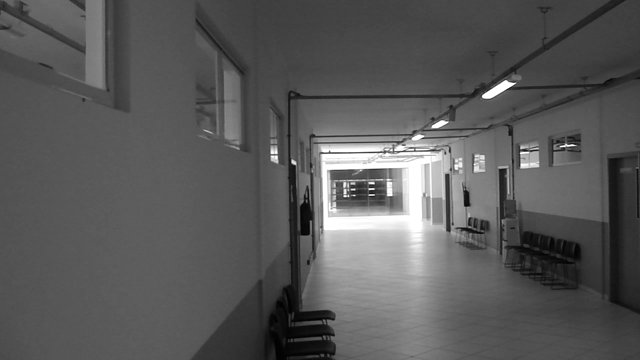

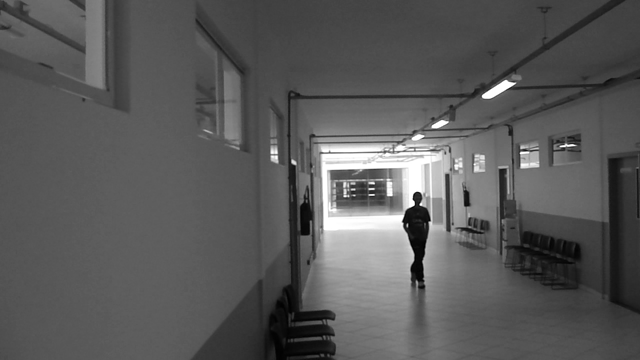

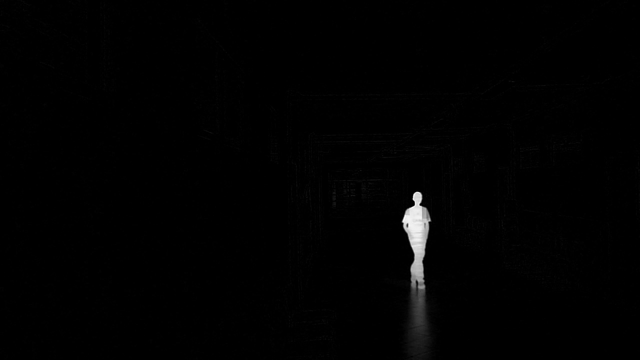

In [31]:
corredor = cv2.imread('resources/corredor.bmp', cv2.IMREAD_GRAYSCALE)
corredorobjeto = cv2.imread('resources/corredorobjeto.bmp', cv2.IMREAD_GRAYSCALE)

mat = np.clip(np.subtract(corredor.astype(int), corredorobjeto.astype(int)),
              0, 255).astype(np.uint8)

imga_cv2 = cv2.imencode('.jpg', corredor)
imgb_cv2 = cv2.imencode('.jpg', corredorobjeto)
img_cv2 = cv2.imencode('.jpg', mat)

clear_output(wait=True)
display(PILImage.open(io.BytesIO(Image(data=imga_cv2[1].tobytes()).data)).resize((640, 360)))
display(PILImage.open(io.BytesIO(Image(data=imgb_cv2[1].tobytes()).data)).resize((640, 360)))
display(PILImage.open(io.BytesIO(Image(data=img_cv2[1].tobytes()).data)).resize((640, 360)))

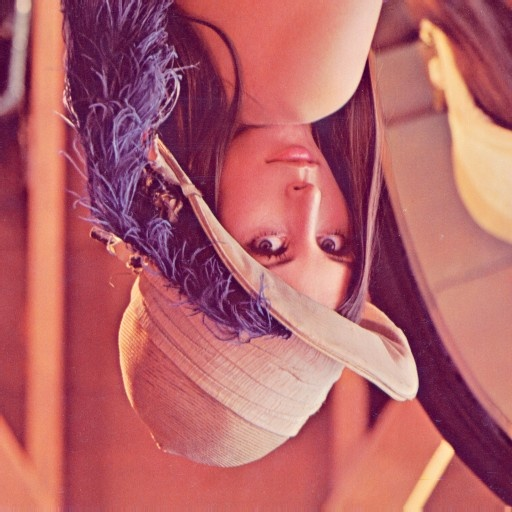

In [11]:
from copy import copy
lena = cv2.imread('resources/Lena.jpg')
halve_shape = lena.shape[0]//2

for ii in range(0, lena.shape[1]):
    for i in range(0, halve_shape):
        px_up = copy(lena[i][ii])

        lena[i][ii] = copy(lena[lena.shape[0] -1 - i][ii])
        lena[lena.shape[0] -1 - i][ii] = px_up

img_cv2 = cv2.imencode('.jpg', lena)
clear_output(wait=True)
display(Image(data=img_cv2[1].tobytes()))

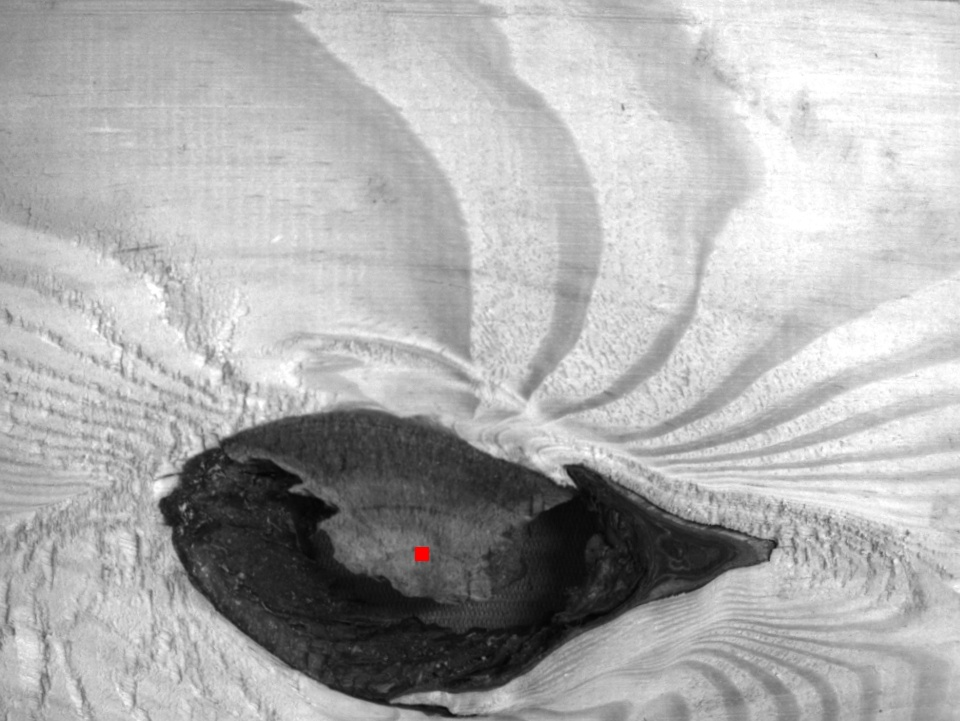

In [12]:
mat = cv2.imread('resources/madeira.jpg', cv2.IMREAD_GRAYSCALE)
_, mat = cv2.threshold(mat, 90, 255, cv2.THRESH_BINARY)

blk_coordinates = []

for i in range(mat.shape[0]):
    for ii in range(mat.shape[1]):
        if mat[i][ii] == 0:
            blk_coordinates.append((i, ii))

center = np.array(blk_coordinates).mean(axis=0)

mat = cv2.imread('resources/madeira.jpg')
radius = 7
for i in range(int(center[0]) - radius, int(center[0]) + radius):
    for ii in range(int(center[1]) - radius, int(center[1]) + radius):
        mat[i][ii] = (0, 0, 255)

img_cv2 = cv2.imencode('.jpg', mat)
clear_output(wait=True)
display(Image(data=img_cv2[1].tobytes()))
